In [79]:
import pandas as pd
import numpy as np

# Overall 검정 프로세스

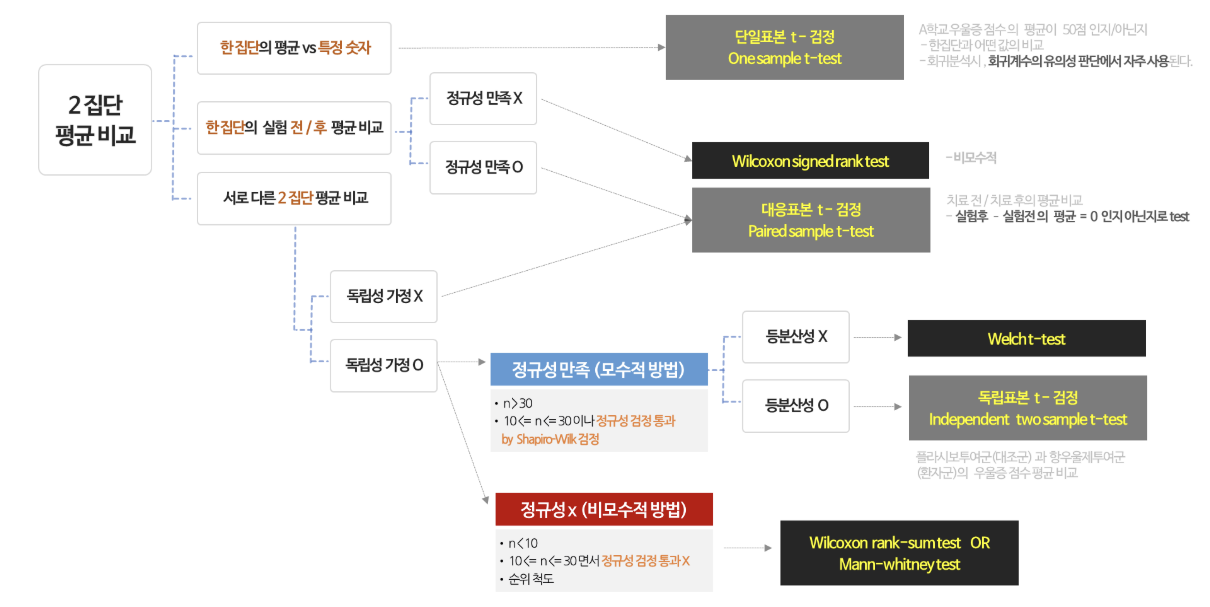

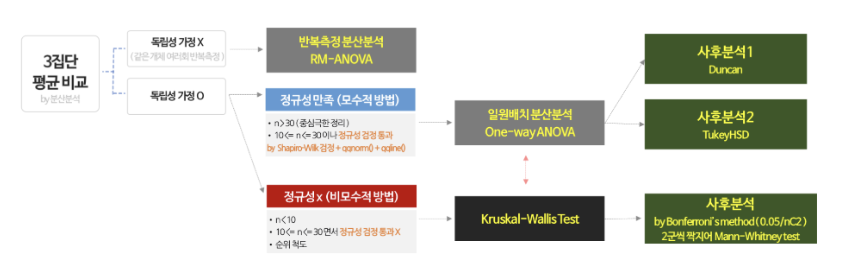

# 1. 모수검정

##  * 모수적 검정의 가정

### 1) 정규성

중심극한정리에 의해 표본수(n)가 30이 넘어가면 데이터셋이 정규분포에 가까워진다.

그러나, 경우에 따라 30이 넘어감에도 데이터 특이성에 따라 정규분포를 따르지 않을 수도 있기에 정규성 검정을 통해 데이터의 정규분포를 확인할 수 있다.

귀무가설 H0: 데이터셋이 정규분포를 따른다.

대립가설 H1: 데이터셋이 정규분포를 따르지 않는다.

#### Shapiro-Wilks test

표본 수(n)가 2000미만인 데이터셋에 적합한 정규성 검정

In [64]:
from scipy.stats import shapiro

data = np.random.normal(loc=0, scale=1, size=100)  # 평균 0, 표준편차 1인 정규분포에서 100개 샘플 생성

# Shapiro-Wilk 검정
stat, p_value = shapiro(data)

# 결과 출력
print(f"Shapiro-Wilk Test Statistic: {stat:.4f}")
print(f"P-Value: {p_value:.4f}")

Shapiro-Wilk Test Statistic: 0.9892
P-Value: 0.6024


#### Kolmogorove-Smirnov test

Kolmogorov-Smirnov 검정은 데이터의 분포가 특정 분포(예: 정규 분포)와 동일한지를 비교하는 방법입니다. 이 검정은 두 가지의 누적 분포 함수(CDF) 간의 최대 차이를 평가합니다.

표본수(n)가 2000 초과인 데이터셋에 적합한 정규성 검정

In [66]:
from scipy.stats import kstest

data = np.random.normal(loc=0, scale=1, size=3000)  # 평균 0, 표준편차 1인 정규분포에서 100개 샘플 생성

# Kolmogorov-Smirnov 검정
stat, p_value = kstest(data, 'norm', args=(0, 1))  # 정규 분포와 비교

# 결과 출력
print(f"Kolmogorov-Smirnov Test Statistic: {stat:.4f}")
print(f"P-Value: {p_value:.4f}")

Kolmogorov-Smirnov Test Statistic: 0.0166
P-Value: 0.3748


### 2) 독립성 검정

특별한 검정방법은 없는듯 함. 문제에 주어진 조건을 보고 판단  
ex) 서로 다른 두 집단 -> 독립이라 가정  
        전 후를 비교 -> 독립x라고 가정

### 3) 등분산성 검정

귀무가설 H0: 데이터셋의 분산이 같다.

대립가설 H1: 데이터셋의 분산이 같지 않다.

#### Bartlett 검정
비정규성에 민감하기 떄문에 정규성을 따를 때만 사용해야함.

In [68]:
from scipy.stats import bartlett

group1 = np.random.normal(loc=0, scale=1, size=100)  # 평균 0, 표준편차 1인 정규분포에서 100개 샘플
group2 = np.random.normal(loc=0, scale=1.5, size=100)  # 평균 0, 표준편차 1.5인 정규분포에서 100개 샘플

# Bartlett's test
stat, p_value = bartlett(group1, group2)

# 결과 출력
print(f"Bartlett's Test Statistic: {stat:.4f}")
print(f"P-Value: {p_value:.4f}")

Bartlett's Test Statistic: 26.8624
P-Value: 0.0000


#### Levene's 검정
정규분포와 관계없이 연속적인 분포로부터 데이터를 구했을 때 사용하는 검정 방법

In [67]:
from scipy.stats import levene

# 데이터 생성
group1 = np.random.normal(loc=0, scale=1, size=100)  # 평균 0, 표준편차 1인 정규분포에서 100개 샘플
group2 = np.random.normal(loc=0, scale=1.5, size=100)  # 평균 0, 표준편차 1.5인 정규분포에서 100개 샘플

# Levene's test
stat, p_value = levene(group1, group2)

# 결과 출력
print(f"Levene's Test Statistic: {stat:.4f}")
print(f"P-Value: {p_value:.4f}")

Levene's Test Statistic: 16.8409
P-Value: 0.0001


## 1-1) 모평균 검정

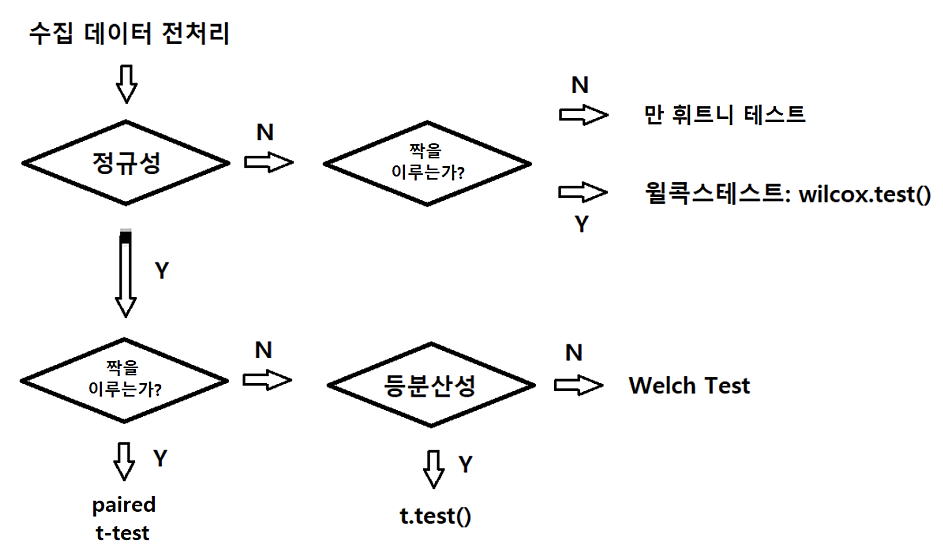

#### 1) Z 검정

In [26]:
### 모표준편차를 아는 경우의 추정
# 모평균의 추정

x = 31100
n = 36
sigma = 4500 #모 표준편차
conf_a = 0.05 # 신뢰수준(confidence level) 95% 기준

from scipy.stats import norm #표준정규분포 Z 사용

SE = sigma / (n**0.5) #표준오차
conf_z = norm.ppf(1-conf_a/2) #ppf는 확률을 넣으면 x값이 나옴 vs cdf: x값을 넣으면 확률이 나옴
ME = conf_z * SE  #오차의 한계 = 허용오차(Margin of Error)

print("[추정]")
print("점 추정량: {:.3f}".format(x))
print("구간추정량: {:.3f}~{:.3f}".format(x-ME,x+ME))
print("오차의 한계: {:.3f}".format(ME))

[추정]
점 추정량: 31100.000
구간추정량: 29630.027~32569.973
오차의 한계: 1469.973


#### - 정규분포(Z분포) vs T분포

정규분포(Z분포): 모분산(모표준편차)을 알 때 or 표본 개수가 30개 이상일 때   
T분포: 모분산(모표준편차)을 모르고 && 표본 개수가 30개 미만일 때 
  
  #### - 기각역 설정은 대립가설을 따라가면 됨
ex) 양측검정 -> 기각역 양쪽 설정 /   좌측검정 -> 기각역 왼쪽에 설정 / 우측검정 -> 기각역 오른쪽에 설정

#### 2) 일표본 t검정

In [31]:
data = [1,2,3,4,5,6,7,8,9,10]
popmean = 4 ##가설의 가상의 모평균

In [33]:
from scipy.stats import ttest_1samp

ttest_1samp(data,popmean) ##상위 버전에서는 alternative를 통해 단측/양측 검정 설정 가능

Ttest_1sampResult(statistic=1.5666989036012806, pvalue=0.1516274744876827)

#### 3) 이표본 t검정

In [51]:
data_a = pd.Series([2,5,3,4,6,2,3])
data_b = pd.Series([7,3,6,5,2,6,7])

In [81]:
from scipy.stats import ttest_ind

# 등분산 가정에 따라 equal_var 인자에 True of False를 넣어줌(default: True)
display(ttest_ind(data_a,data_b, equal_var=True))

## 등분산 가정을 만족하지 못할 떄 Welch t-test라고 함
ttest_ind(data_a,data_b, equal_var=False)

Ttest_indResult(statistic=-1.6840241981634352, pvalue=0.11798712107710582)

Ttest_indResult(statistic=-1.684024198163435, pvalue=0.11958234592838302)

#### 4) 대응표본 t 검정

In [59]:
from scipy.stats import ttest_rel

ttest_rel(data_a, data_b)

Ttest_relResult(statistic=-1.219715097075045, pvalue=0.2683379268893624)

## 1-2) 모비율 검정

#### 모비율 검정은 기본적으로 정규분포를 사용
(중심극한 정리에 기반, 모비율이 p일 때, 표본의 비율 𝑝^은 이항분포를 따름. 표본의 크기 n이 충분히 크다면, 이항분포는 정규분포로 근사 가능)

이항분포 평균: p, 분산: pq

*모비율 검정을 진행할 떄, 분산에 사용되는 p값은 귀무가설의 p값이어야 함!!!!!!!(표본비율 p가 아님을 주의!!!)

### 모비율 검정통계량 공식

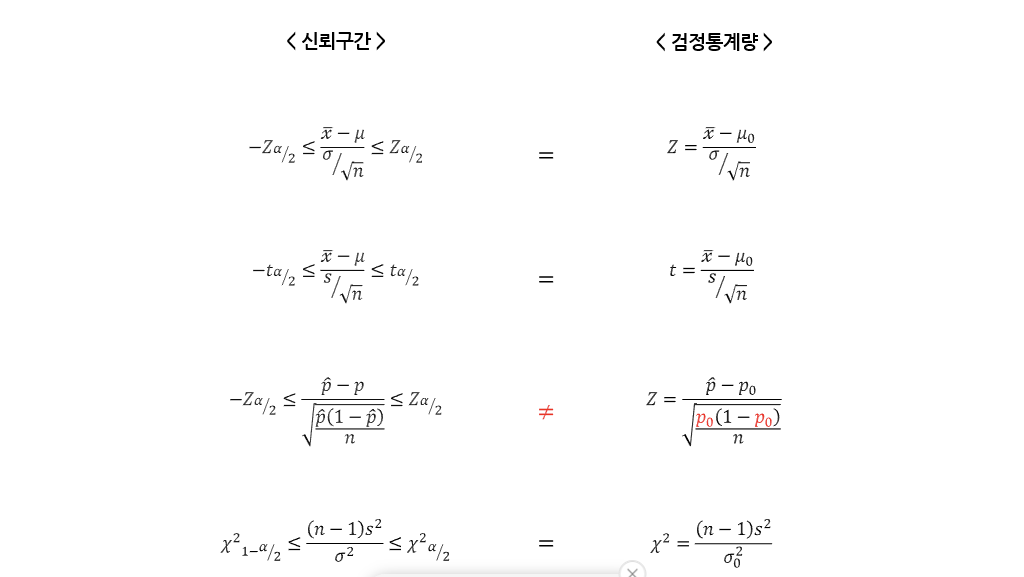

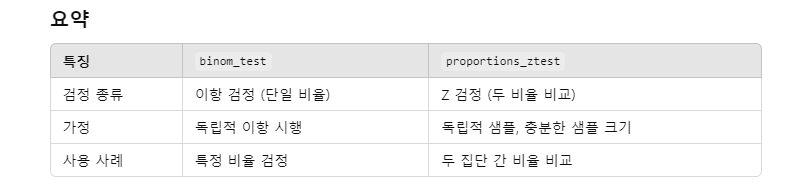

ex) A중학교에는 100명 중에 45명이 흡연을 한다. 국가 통계를 보니 중학생 흡연율은 35%라고 한다. 같나?

In [45]:
from scipy. stats import binom_test

binom_test(45,100,0.35, alternative='two-sided') #return p value

0.04574418461040126

In [47]:
from statsmodels.stats.proportion import proportions_ztest

proportions_ztest(45,100, value=0.35, alternative="two-sided")

(2.0100756305184246, 0.04442318485000599)

ex) 복날에 A회사 사람들 300명 중 100명이 삼계탕을 먹었고, B회사 사람들 400명 중 170명이 삼계탕을 먹었다. 비율이 같냐?

In [49]:
## 2집단에 대한 비율검정 진행시 관측치와 모수를 각각 리스트로 넣어준다

count = np.array([100, 170])
nobs = np.array([300, 400])

z, p = proportions_ztest(count=count, nobs=nobs, value=0)
z,p

(-2.4656701201792273, 0.013675721698622408)

## 1-3) 모분산검정

#### 1) 일표본 모분산 검정

In [76]:
from scipy.stats import chi2

# 데이터 생성
data = np.random.normal(loc=0, scale=2, size=30)  # 평균 0, 표준편차 2인 정규분포에서 30개 샘플 생성

# 샘플 분산 계산
sample_variance = np.var(data, ddof=1)  # 표본 분산 (Bessel's correction)

# 카이제곱 통계량 계산
n = len(data)  # 샘플 크기
alpha = 4  # 검정하고자 하는 모분산
chi2_stat = (n - 1) * sample_variance / alpha

# p-value 계산
p_value = 1 - chi2.cdf(chi2_stat, df=n-1)

# 결과 출력
print(f"Chi-Squared Statistic: {chi2_stat:.4f}")
print(f"P-Value: {p_value:.4f}")

Chi-Squared Statistic: 31.3657
P-Value: 0.3484


#### 2) 이표본 모분산 검정

In [77]:
from scipy.stats import f

# 데이터 생성
group1 = np.random.normal(loc=0, scale=2, size=30)  # 첫 번째 그룹
group2 = np.random.normal(loc=0, scale=3, size=30)  # 두 번째 그룹

# 두 집단의 분산 계산
var1 = np.var(group1, ddof=1)
var2 = np.var(group2, ddof=1)

# F-통계량 계산
f_stat = var1 / var2  # 첫 번째 그룹의 분산이 두 번째 그룹의 분산에 대한 비율

# p-value 계산
df1 = len(group1) - 1
df2 = len(group2) - 1
p_value = 1 - f.cdf(f_stat, df1, df2)  # 오른쪽 검정

# 결과 출력
print(f"F-Statistic: {f_stat:.4f}")
print(f"P-Value: {p_value:.4f}")

F-Statistic: 0.5187
P-Value: 0.9588


### [참고] 분포별 검정통계량

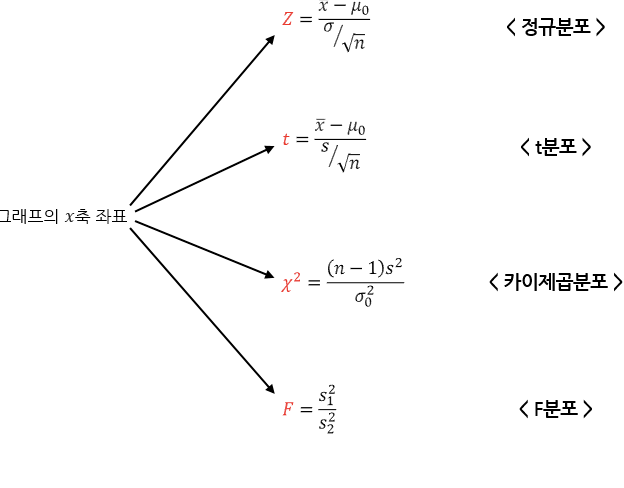

## 1-4) 분산분석

ANOVA(Analysis of Variance) 분산분석
- 3개 이상의 집단들의 평균값을 비교하는 방법
- 집단간분산(variance between groups)/집단내분산(variance within group) 기반의 F분포를 이용함


가정
- 독립성(Independence), 정규성(Normality), 등분산성(Homogeneity of Variance)


귀무가설 H0: 집단들의 평균값이 같다

대립가설 H1: 하나 또는 하나 이상의 집단의 평균값이 같지 않다

### 1) one-way ANOVA

한 개의 요인이 여러 집단의 평균에 미치는 영향을 분석합니다. 주로 그룹 간의 차이를 확인할 때 사용됩니다.

In [85]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# 데이터 생성
data = {
    'value': [23, 21, 18, 25, 22,   # 그룹 1
              30, 31, 29, 32, 28,   # 그룹 2
              25, 27, 24, 26, 23],  # 그룹 3
    'group': ['A', 'A', 'A', 'A', 'A',  # 그룹 1
              'B', 'B', 'B', 'B', 'B',  # 그룹 2
              'C', 'C', 'C', 'C', 'C']   # 그룹 3
}

df = pd.DataFrame(data)

# One-way ANOVA 수행
model = ols('value ~ C(group)', data=df).fit()  # 그룹을 범주형 변수로 지정
anova_table = sm.stats.anova_lm(model, typ=2)

# 결과 출력
print(anova_table)

# 결과 해석
if anova_table['PR(>F)'].min() < 0.05:
    print("적어도 하나의 그룹 평균이 다릅니다.")
else:
    print("모든 그룹 평균이 동일합니다.")

          sum_sq    df          F    PR(>F)
C(group)   170.8   2.0  21.897436  0.000099
Residual    46.8  12.0        NaN       NaN
적어도 하나의 그룹 평균이 다릅니다.


### 2) two-way ANOVA

Two-way ANOVA는 두 개의 독립 변수가 세 개 이상의 집단의 평균에 미치는 영향을 평가하는 방법입니다. 이 검정은 두 요인의 주효과와 상호작용 효과를 동시에 분석할 수 있습니다

In [86]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# 데이터 생성
data = {
    'value': [23, 21, 18, 25, 22,
              30, 31, 29, 32, 28,
              25, 27, 24, 26, 23],
    'factor1': ['A', 'A', 'A', 'A', 'A',
                 'B', 'B', 'B', 'B', 'B',
                 'C', 'C', 'C', 'C', 'C'],
    'factor2': ['X', 'X', 'X', 'X', 'X',
                 'Y', 'Y', 'Y', 'Y', 'Y',
                 'Z', 'Z', 'Z', 'Z', 'Z']
}

df = pd.DataFrame(data)

# Two-way ANOVA 수행
model = ols('value ~ C(factor1) + C(factor2) + C(factor1):C(factor2)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# 결과 출력
print(anova_table)

# 결과 해석
if anova_table['PR(>F)'].min() < 0.05:
    print("적어도 하나의 요인이 유의미한 영향을 미칩니다.")
else:
    print("모든 요인이 유의미한 영향을 미치지 않습니다.")

                       sum_sq    df          F    PR(>F)
C(factor1)                NaN   2.0        NaN       NaN
C(factor2)                NaN   2.0        NaN       NaN
C(factor1):C(factor2)   341.6   4.0  21.897436  0.000099
Residual                 46.8  12.0        NaN       NaN
적어도 하나의 요인이 유의미한 영향을 미칩니다.


C:\Users\rkddn\Anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 2, but rank is 0
  'rank is %d' % (J, J_), ValueWarning)
C:\Users\rkddn\Anaconda3\lib\site-packages\statsmodels\base\model.py:1848: RuntimeWarning: invalid value encountered in true_divide
  F /= J
C:\Users\rkddn\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)
C:\Users\rkddn\Anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 4, but rank is 2
  'rank is %d' % (J, J_), ValueWarning)


### 3) 사후검정(TukeyHSD)

ANOVA를 수행한 후, 귀무 가설이 기각되면 어떤 그룹 간에 차이가 있는지를 확인하기 위해 사후 검정(post hoc test)을 수행한다.

In [94]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# 데이터 생성
np.random.seed(0)
group1 = np.random.normal(20, 5, 30)  # 그룹 1
group2 = np.random.normal(22, 5, 30)  # 그룹 2
group3 = np.random.normal(25, 5, 30)  # 그룹 3

# 데이터프레임 생성
data = pd.DataFrame({
    'value': np.concatenate([group1, group2, group3]),
    'group': ['A'] * 30 + ['B'] * 30 + ['C'] * 30
})

# One-way ANOVA 수행
model = ols('value ~ C(group)', data=data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print("ANOVA Table:")
print(anova_table)

# Tukey's HSD 수행
tukey_results = pairwise_tukeyhsd(endog=data['value'], groups=data['group'], alpha=0.05)
print("\nTukey's HSD Results:")
print(tukey_results)

ANOVA Table:
               sum_sq    df         F    PR(>F)
C(group)   215.249235   2.0  4.336985  0.016016
Residual  2158.951655  87.0       NaN       NaN

Tukey's HSD Results:
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower  upper  reject
--------------------------------------------------
     A      B  -1.6619  0.405 -4.729 1.4052  False
     A      C   2.1171 0.2323  -0.95 5.1842  False
     B      C    3.779 0.0117 0.7119 6.8461   True
--------------------------------------------------


Tukey's HSD 결과: 각 그룹 간의 평균 차이를 보여줍니다. p-value가 0.05 미만이면 해당 그룹 간의 평균 차이가 유의미하다고 판단할 수 있습니다.

#### Two-way ANOVA의 사후분석

In [129]:
# Two-way ANOVA 수행
model = ols('value ~ C(factor1) + C(factor2) + C(factor1):C(factor2)', data=data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print("Two-way ANOVA Table:")
print(anova_table)

# Tukey's HSD 수행 (주효과 분석)
# factor1의 주효과
tukey1 = pairwise_tukeyhsd(endog=data['value'], groups=data['factor1'], alpha=0.05)
print("\nTukey's HSD Results for Factor 1:")
print(tukey1)

# factor2의 주효과
tukey2 = pairwise_tukeyhsd(endog=data['value'], groups=data['factor2'], alpha=0.05)
print("\nTukey's HSD Results for Factor 2:")
print(tukey2)


PatsyError: Error evaluating factor: IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices
    value ~ C(factor1) + C(factor2) + C(factor1):C(factor2)
    ^^^^^

# 2. 비모수 검정

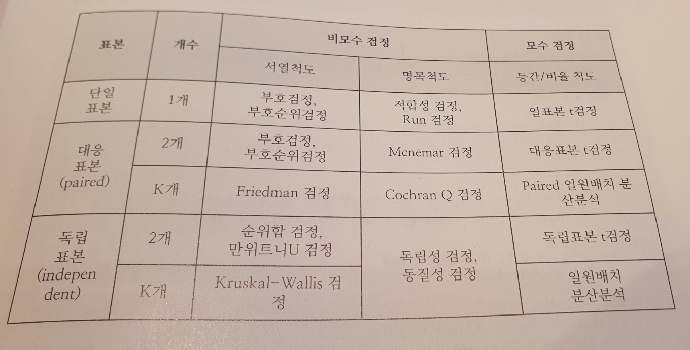

## * 수치형

## 2-1) Wilcoxon signed-rank test(대응표본 / 1~2개)

  두 관련 집단 비교: 동일한 집단에서 두 가지 조건을 비교할 때 사용합니다. 예를 들어, 치료 전후의 데이터.  


정규성 가정 불만족: 데이터가 정규 분포를 따르지 않을 때 사용합니다. 이는 t-test와 같은 모수적 검정 대신 비모수적 검정을 사용하는 이유입니다.


순위 기반 차이 평가: 데이터의 차이를 순위로 변환하여 분석합니다.

In [95]:
from scipy.stats import wilcoxon

# 데이터 생성: 치료 전후의 점수
before = np.array([85, 88, 90, 87, 92])  # 치료 전 점수
after = np.array([90, 89, 91, 93, 95])   # 치료 후 점수

# Wilcoxon signed-rank test 수행
stat, p_value = wilcoxon(after, before)

# 결과 출력
print(f"Wilcoxon Test Statistic: {stat:.4f}")
print(f"P-Value: {p_value:.4f}")

# 결과 해석
if p_value < 0.05:
    print("치료 전후 점수 간에 유의미한 차이가 있습니다.")
else:
    print("치료 전후 점수 간에 유의미한 차이가 없습니다.")

Wilcoxon Test Statistic: 0.0000
P-Value: 0.0625
치료 전후 점수 간에 유의미한 차이가 없습니다.


## 2-2) Mann-Whitney, Wilcoxon ranksum(독립표본, 2개)

두 독립 집단 비교: 두 그룹의 중앙값을 비교하고자 할 때 사용합니다.


정규 분포를 가정할 수 없을 때: 데이터가 정규성을 따르지 않거나 분산이 동일하지 않을 때 적합합니다.

In [98]:
from scipy.stats import mannwhitneyu

# 데이터 생성: 두 독립 집단
group1 = np.array([12, 15, 14, 10, 13])  # 그룹 1
group2 = np.array([22, 25, 24, 20, 21])  # 그룹 2

# Wilcoxon ranksum 검정 (Mann-Whitney U 검정)
stat, p_value = mannwhitneyu(group1, group2, alternative='two-sided')

# 결과 출력
print(f"Wilkoxon Ranksum U Statistic: {stat:.4f}")
print(f"P-Value: {p_value:.4f}")

# 결과 해석
if p_value < 0.05:
    print("두 그룹의 중앙값 간에 유의미한 차이가 있습니다.")
else:
    print("두 그룹의 중앙값 간에 유의미한 차이가 없습니다.")

Wilkoxon Ranksum U Statistic: 0.0000
P-Value: 0.0122
두 그룹의 중앙값 간에 유의미한 차이가 있습니다.


## 2-3) Friedman test(대응표본, 3개 이상)

세 개 이상의 관련 그룹 비교: 동일한 샘플에서 여러 조건이나 처리 방법을 비교할 때 사용합니다. 예를 들어, 동일한 대상에게 세 가지 다른 치료를 적용한 경우.

    
정규성 가정 불만족: 데이터가 정규성을 따르지 않거나 분산이 동일하지 않을 때 적합합니다.
    
    
반복 측정 데이터: 반복적으로 측정된 데이터의 차이를 평가할 때 사용됩니다.

In [104]:
from scipy.stats import friedmanchisquare

# 데이터 생성: 동일한 샘플에서 세 가지 다른 처리에 대한 점수
treatment1 = np.array([15, 16, 14, 13, 15])  # 치료 1
treatment2 = np.array([14, 15, 13, 15, 14])  # 치료 2
treatment3 = np.array([16, 17, 15, 16, 16])  # 치료 3

# 데이터 배열로 결합
data = np.array([treatment1, treatment2, treatment3])

# Friedman 검정 수행
stat, p_value = friedmanchisquare(*data)

# 결과 출력
print(f"Friedman Test Statistic: {stat:.4f}")
print(f"P-Value: {p_value:.4f}")

# 결과 해석
if p_value < 0.05:
    print("세 치료 간에 유의미한 차이가 있습니다.")
else:
    print("세 치료 간에 유의미한 차이가 없습니다.")

Friedman Test Statistic: 8.4000
P-Value: 0.0150
세 치료 간에 유의미한 차이가 있습니다.


## 2-4) Kruskal-Wallis 검정(독립표본, 3개 이상)

세 개 이상의 독립 집단 비교: 서로 관련되지 않은 여러 그룹의 중앙값을 비교할 때 사용합니다.
    
    
    
정규성 가정 불만족: 데이터가 정규 분포를 따르지 않거나, 집단 간의 분산이 다를 때 적합합니다.

In [106]:
from scipy.stats import kruskal

# 데이터 생성: 세 개의 독립 집단
group1 = np.array([12, 15, 14, 10, 13])  # 그룹 1
group2 = np.array([22, 25, 24, 20, 21])  # 그룹 2
group3 = np.array([17, 18, 16, 19, 20])  # 그룹 3

# Kruskal-Wallis 검정 수행
stat, p_value = kruskal(group1, group2, group3)

# 결과 출력
print(f"Kruskal-Wallis H Statistic: {stat:.4f}")
print(f"P-Value: {p_value:.4f}")

# 결과 해석
if p_value < 0.05:
    print("세 그룹의 중앙값 간에 유의미한 차이가 있습니다.")
else:
    print("세 그룹의 중앙값 간에 유의미한 차이가 없습니다.")

Kruskal-Wallis H Statistic: 12.2769
P-Value: 0.0022
세 그룹의 중앙값 간에 유의미한 차이가 있습니다.


## * 범주형

## 2-5) 카이제곱 적합성(1개) / 독립성(2개 이상) 검정

In [113]:
from scipy.stats import chisquare

# 관측 빈도
observed = np.array([30, 50, 20])  # 실제 관측된 빈도
# 기대 빈도 (예: 균등 분포)
expected = np.array([33.33, 33.33, 33.33])  # 기대되는 빈도

# 카이제곱 적합성 검정 수행
chi2_stat, p_value = chisquare(observed, f_exp=expected)

# 결과 출력
print(f"Chi-Squared Statistic: {chi2_stat:.4f}")
print(f"P-Value: {p_value:.4f}")

# 결과 해석
if p_value < 0.05:
    print("관측된 빈도가 기대되는 빈도와 유의미하게 다릅니다.")
else:
    print("관측된 빈도와 기대 빈도 간에 유의미한 차이가 없습니다.")

Chi-Squared Statistic: 14.0014
P-Value: 0.0009
관측된 빈도가 기대되는 빈도와 유의미하게 다릅니다.


In [114]:
from scipy.stats import chi2_contingency

# 2x2 교차표 데이터 생성
# 예: 성별에 따른 선호하는 음료
data = np.array([[30, 10],  # 남성
                 [5,  55]])  # 여성

# 카이제곱 독립성 검정 수행
chi2_stat, p_value, dof, expected = chi2_contingency(data)

# 결과 출력
print(f"Chi-Squared Statistic: {chi2_stat:.4f}")
print(f"P-Value: {p_value:.4f}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected)

# 결과 해석
if p_value < 0.05:
    print("두 변수는 독립적이지 않습니다.")
else:
    print("두 변수는 독립적입니다.")

Chi-Squared Statistic: 44.0018
P-Value: 0.0000
Degrees of Freedom: 1
Expected Frequencies:
[[14. 26.]
 [21. 39.]]
두 변수는 독립적이지 않습니다.


## 2-6) Mcnemar test(대응표본, 2개)

두 관련 집단 비교: 동일한 대상에서 두 가지 조건(예: 치료 전후)으로 이진 결과를 비교할 때 사용합니다.



이진 데이터: 결과가 두 가지로만 나뉘어질 때 사용됩니다. 예를 들어, 특정 치료가 효과가 있는지 없는지를 평가할 때 적합합니다.



교차표 분석: 두 변수 간의 차이를 평가하기 위해 2x2 교차표 형태로 데이터를 표현합니다.

In [112]:
import statsmodels.api as sm

# 2x2 교차표 데이터 생성
# 예: 치료 전후의 효과 (예: 효과 있음/없음)
#       | 치료 효과 있음 | 치료 효과 없음
# -------|----------------|----------------
# 있음  |       a        |       b
# 없음  |       c        |       d
data = np.array([[30, 10],  # a, b
                 [5,  55]])  # c, d

# McNemar 검정 수행
result = sm.stats.mcnemar(data, exact=True)

# 결과 출력
print(f"McNemar Test Statistic: {result.statistic:.4f}")
print(f"P-Value: {result.pvalue:.4f}")

# 결과 해석
if result.pvalue < 0.05:
    print("두 조건 간에 유의미한 차이가 있습니다.")
else:
    print("두 조건 간에 유의미한 차이가 없습니다.")

McNemar Test Statistic: 5.0000
P-Value: 0.3018
두 조건 간에 유의미한 차이가 없습니다.


## 2-7) Cochran Q 검정(대응표본, 3개 이상)

세 개 이상의 관련 집단 비교: 동일한 대상을 대상으로 여러 조건(예: 치료 방법, 시간 등)에서 이진 결과(예: 성공/실패)를 평가할 때 사용됩니다.


이진 데이터: 결과가 두 가지로 나뉘어질 때 사용됩니다.


교차표 분석: 반복 측정된 이진 결과를 분석합니다.

In [116]:
import statsmodels.api as sm

# 3개의 치료 조건에 대한 이진 결과 데이터 생성
#       | 치료 1 | 치료 2 | 치료 3
# ------|--------|--------|--------
# 성공  |   a    |   b    |   c
# 실패  |   d    |   e    |   f
data = np.array([[10, 20, 30],  # 성공
                 [5,  15, 10]])  # 실패

# Cochran Q 검정 수행
result = sm.stats.cochrans_q(data)

# 결과 출력
print(f"Cochran Q Statistic: {result.statistic:.4f}")
print(f"P-Value: {result.pvalue:.4f}")

# 결과 해석
if result.pvalue < 0.05:
    print("세 조건 간에 유의미한 차이가 있습니다.")
else:
    print("세 조건 간에 유의미한 차이가 없습니다.")

Cochran Q Statistic: 2.0000
P-Value: 0.3679
세 조건 간에 유의미한 차이가 없습니다.


# 상관분석 가설검정

귀무가설 (H0): 두 변수 간에 상관관계가 없다. (상관계수 ρ = 0)
    
대립가설 (H1): 두 변수 간에 상관관계가 있다. (상관계수 ρ ≠ 0)

## 1) 모수적방법(pearson)

In [119]:
from scipy.stats import pearsonr

# 데이터 생성
np.random.seed(0)
x = np.random.rand(100)  # 독립 변수
y = 2 * x + np.random.normal(0, 0.1, 100)  # 종속 변수, x와 강한 상관관계

# 상관계수와 p-value 계산
corr_coef, p_value = pearsonr(x, y)

# 결과 출력
print(f"Pearson Correlation Coefficient: {corr_coef:.4f}")
print(f"P-Value: {p_value:.4f}")

# 결과 해석
if p_value < 0.05:
    print("상관계수가 유의미합니다. 두 변수 간에 상관관계가 있습니다.")
else:
    print("상관계수가 유의미하지 않습니다. 두 변수 간에 상관관계가 없습니다.")

Pearson Correlation Coefficient: 0.9853
P-Value: 0.0000
상관계수가 유의미합니다. 두 변수 간에 상관관계가 있습니다.


## 2) 비모수적방법(spearman / kendalltau)

In [128]:
from scipy.stats import spearmanr
from scipy.stats import kendalltau

# 데이터 생성
np.random.seed(0)
x = np.random.rand(100)  # 독립 변수
y = 2 * x + np.random.normal(0, 0.5, 100)  # 비선형 관계

# Spearman 상관계수 계산
spearman_corr, s_p_value = spearmanr(x, y)
kendalltau_corr, k_p_value = kendalltau(x,y)

# 결과 출력
print(f"Spearman Correlation Coefficient: {spearman_corr:.4f}")
print(f"P-Value: {s_p_value:.4f}")

print(f"Kendall's Tau: {kendalltau_corr:.4f}")
print(f"P-Value: {k_p_value:.4f}")

# 결과 해석
if s_p_value < 0.05:
    print("Spearman 상관계수가 유의미합니다. 두 변수 간에 상관관계가 있습니다.")
else:
    print("Spearman 상관계수가 유의미하지 않습니다. 두 변수 간에 상관관계가 없습니다.")

if k_p_value < 0.05:
    print("Kendall의 타우 계수가 유의미합니다. 두 변수 간에 상관관계가 있습니다.")
else:
    print("Kendall의 타우 계수가 유의미하지 않습니다. 두 변수 간에 상관관계가 없습니다.")

Spearman Correlation Coefficient: 0.7445
P-Value: 0.0000
Kendall's Tau: 0.5410
P-Value: 0.0000
Spearman 상관계수가 유의미합니다. 두 변수 간에 상관관계가 있습니다.
Kendall의 타우 계수가 유의미합니다. 두 변수 간에 상관관계가 있습니다.
